# Linear Regression model

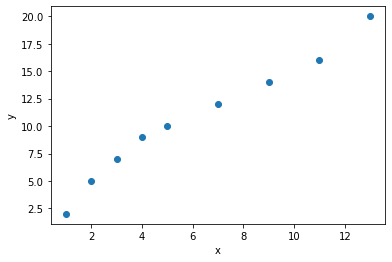

In [1]:
import matplotlib.pyplot as plt
import numpy as np


x = np.array([[1,2,3,4,5,7,9,11,13]]).T
y = np.array([[2,5,7,9,10,12,14,16,20]]).T

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [2]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_test)
print(y_test)


[[11]
 [ 3]]
[[16]
 [ 7]]


In [3]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

#train model
regr.fit(x_train, y_train)

print(regr.intercept_)
print(regr.coef_)


[2.11444142]
[[1.39509537]]


In [4]:
x_range = np.array([min(x),max(x)])
x_range
y_predict_range = regr.predict(x_range)
y_predict_range

array([[ 3.50953678],
       [20.2506812 ]])

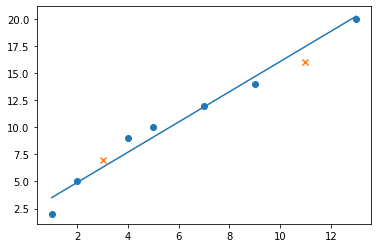

In [5]:
plt.plot(x_range, y_predict_range)
plt.scatter(x_train,y_train)
plt.scatter(x_test, y_test, marker = 'x')
plt.show()

In [6]:
#Predict test set result
y_predict = regr.predict(x_test)
print(y_test)
print(y_predict)

[[16]
 [ 7]]
[[17.46049046]
 [ 6.29972752]]


In [7]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_predict))

0.9352243471906797


# Multiple linear Regression model

In [8]:
import pandas as pd
import numpy as np
data = pd.read_csv("MultipleRegressionData.csv")

In [9]:
data


,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000.0,790.0,99.0
1,Mitsubishi,Space Star,1200.0,1160.0,95.0
2,Skoda,Citigo,1000.0,929.0,95.0
3,Fiat,500,900.0,865.0,90.0
4,Mini,Cooper,1500.0,1140.0,105.0
5,VW,Up!,1000.0,929.0,105.0
6,Skoda,Fabia,1400.0,1109.0,90.0
7,Mercedes,A-Class,1500.0,1365.0,92.0
8,Ford,Fiesta,1500.0,1112.0,98.0
9,Audi,A1,1600.0,1150.0,99.0


In [10]:
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Car,36,17,Mercedes,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,36,35,Fiesta,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volume,36.0,NaN,NaN,NaN,1611.111111,388.975047,900.0,1475.0,1600.0,2000.0,2500.0
Weight,36.0,NaN,NaN,NaN,1292.277778,242.123889,790.0,1117.25,1329.0,1418.25,1746.0
CO2,36.0,NaN,NaN,NaN,102.027778,7.454571,90.0,97.75,99.0,105.0,120.0


In [11]:
df = data.dropna()


In [12]:
# Select columns for normalization
columns_to_normalize = df.iloc[:, 2:4]
columns_to_normalize

,Volume,Weight
0,1000.0,790.0
1,1200.0,1160.0
2,1000.0,929.0
3,900.0,865.0
4,1500.0,1140.0
5,1000.0,929.0
6,1400.0,1109.0
7,1500.0,1365.0
8,1500.0,1112.0
9,1600.0,1150.0


In [18]:
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

                                                   
# Select columns for normalization
columns_to_normalize = ['Volume', 'Weight', 'CO2']

# Normalize the selected columns
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized DataFrame
print("Normalized DataFrame:")
print(df.head())                                                   

Normalized DataFrame:
          Car       Model  Volume    Weight       CO2
0      Toyota        Aygo  0.0625  0.000000  0.300000
1  Mitsubishi  Space Star  0.1875  0.387029  0.166667
2       Skoda      Citigo  0.0625  0.145397  0.166667
3        Fiat         500  0.0000  0.078452  0.000000
4        Mini      Cooper  0.3750  0.366109  0.500000


In [20]:
from sklearn.preprocessing import StandardScaler
# Select columns for standardization
columns_to_standardize = ['Volume', 'Weight', 'CO2']

# Standardize the selected columns
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Display the standardized DataFrame
print("Standardized DataFrame:")
print(df.head())

Standardized DataFrame:
          Car       Model    Volume    Weight       CO2
0      Toyota        Aygo -1.593366 -2.103893 -0.411925
1  Mitsubishi  Space Star -1.071901 -0.554072 -0.956120
2       Skoda      Citigo -1.593366 -1.521663 -0.956120
3        Fiat         500 -1.854099 -1.789740 -1.636364
4        Mini      Cooper -0.289703 -0.637846  0.404367


In [23]:

# Step 1: Define independent variables (Volume and Weight) and dependent variable (CO2)
X = df[['Volume', 'Weight']]  # Independent variables
y = df['CO2']  # Dependent variable



In [24]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [ ]:
lets predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3

In [25]:
predictedCO2 = reg.predict([[1300, 2300]])

In [26]:
print(predictedCO2)

[1093.54031888]


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict the target values (CO2) on the training set
y_pred = reg.predict(X)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)

# Calculate Root Mean Squared Error 
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 0.6905152284875765
Mean Squared Error (MSE): 0.6234435956380016
Root Mean Squared Error (RMSE): 0.7895844449063074
R-squared (R²): 0.37655640436199844


# Polynomial Regression

In [38]:
import pandas as pd
dff = pd.read_csv('positionsalary.csv')

In [39]:
dff

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [43]:
features = dff.iloc[:, 1:2].values
features

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [44]:
labels = dff.iloc[:, 2:].values
labels

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

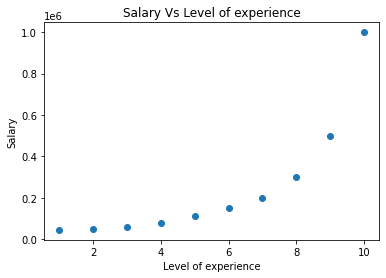

In [45]:
plt.scatter (features, labels)
plt.xlabel('Level of experience')
plt.ylabel('Salary')
plt.title('Salary Vs Level of experience')
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#fitting the linear regression line to the dataset
# Create a LinearRegression instance
linreg = LinearRegression()
# Fit the linear regression model to features and labels
linreg.fit(features, labels)

#fitting the polynomial regression line to the dataset
# Create a PolynomialFeatures instance with a degree of 3
poly = PolynomialFeatures(degree = 3)

# Transform the original features into polynomial features
X_poly = poly.fit_transform(features)

# Fit the polynomial features to the labels
poly.fit(X_poly, labels)

# Create another LinearRegression instance
linreg2 = LinearRegression()

# Fit a linear regression model to the polynomial features and labels
linreg2.fit(X_poly, labels)

LinearRegression()

In [47]:
# Prediction using Linear Regression
labels_pred = linreg.predict(features)
labels_pred

array([[-114454.54545455],
       [ -33575.75757576],
       [  47303.03030303],
       [ 128181.81818182],
       [ 209060.60606061],
       [ 289939.39393939],
       [ 370818.18181818],
       [ 451696.96969697],
       [ 532575.75757576],
       [ 613454.54545455]])

In [48]:
#R square value for linear regression
from sklearn.metrics import r2_score

r2 = r2_score(labels ,labels_pred)

r2

0.6690412331929895

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming labels are your true values and labels_pred are your predicted values
rmse = np.sqrt(mean_squared_error(labels, labels_pred))
mae = mean_absolute_error(labels, labels_pred)

print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')

RMSE: 163388.735
MAE: 128454.545


In [50]:
#prediction using polynomial regression
labels_pred2 = linreg2.predict(X_poly)
labels_pred2

array([[ 14902.09790208],
       [ 78759.9067599 ],
       [ 94960.37296038],
       [ 88223.77622379],
       [ 83270.39627041],
       [104820.51282052],
       [177594.40559441],
       [326312.35431235],
       [575694.63869463],
       [950461.53846153]])

In [51]:
#R square value using polynomial
from sklearn.metrics import r2_score

r2 = r2_score(labels ,labels_pred2)

r2

0.9812097727913366

In [52]:
labels

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

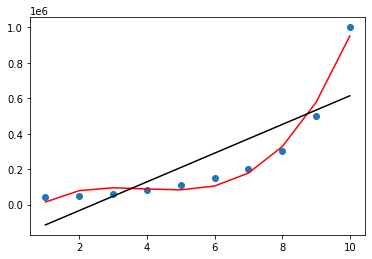

In [53]:
plt.scatter(features, labels)
plt.plot(features, labels_pred2, c='r')
plt.plot(features,labels_pred, c='black')
plt.show()

In [55]:
features = dff['Position'].values
features

array(['Business Analyst', 'Junior Consultant', 'Senior Consultant',
       'Manager', 'Country Manager', 'Region Manager', 'Partner',
       'Senior Partner', 'C-level', 'CEO'], dtype=object)

In [56]:
x1 = pd.DataFrame(features) 
y1 = pd.DataFrame(labels_pred)

df1 = pd.concat([x1,y1], axis=1, keys=['Position','salary_pred_Lin']) 
df1

,Position,salary_pred_Lin
,0,0
0,Business Analyst,-114454.545455
1,Junior Consultant,-33575.757576
2,Senior Consultant,47303.030303
3,Manager,128181.818182
4,Country Manager,209060.606061
5,Region Manager,289939.393939
6,Partner,370818.181818
7,Senior Partner,451696.969697
8,C-level,532575.757576


In [57]:
x1 = pd.DataFrame(features) 
y1 =pd.DataFrame(labels_pred2)

df2 = pd.concat([x1,y1], axis=1, keys=['Position','salary_pred_poly']) 
df2

,Position,salary_pred_poly
,0,0
0,Business Analyst,14902.097902
1,Junior Consultant,78759.906760
2,Senior Consultant,94960.372960
3,Manager,88223.776224
4,Country Manager,83270.396270
5,Region Manager,104820.512821
6,Partner,177594.405594
7,Senior Partner,326312.354312
8,C-level,575694.638695


In [58]:
#Merging the dataframes

pd.merge(df2,df1, how='inner')

,Position,salary_pred_poly,salary_pred_Lin
,0,0,0
0,Business Analyst,14902.097902,-114454.545455
1,Junior Consultant,78759.906760,-33575.757576
2,Senior Consultant,94960.372960,47303.030303
3,Manager,88223.776224,128181.818182
4,Country Manager,83270.396270,209060.606061
5,Region Manager,104820.512821,289939.393939
6,Partner,177594.405594,370818.181818
7,Senior Partner,326312.354312,451696.969697
8,C-level,575694.638695,532575.757576


In [59]:
#To predict the salary for the given Level of experience using polynomial

linreg2.predict(poly.fit_transform([[8.5]]))

array([[436875.43706293]])

In [60]:
#To predict the salary for the level 8.5 using linear regression

import numpy as np

linreg.predict(np.array([ [8.5] ]) )

array([[492136.36363636]])